In [ ]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/My Drive/DeepLearning_UOK_DataFiles/sinhala_letters/")
os.getcwd()

'/content/drive/My Drive/DeepLearning_UOK_DataFiles/sinhala_letters'

In [ ]:
path = "/content/drive/My Drive/DeepLearning_UOK_DataFiles/sinhala_letters/"
files = os.listdir(path)
categories = []

for filename in files:
  category = filename.split('.')[0]
  if category == 'aa':    # image name is 'aa.1.png'
    categories.append(1)
  elif category == 'na':
    categories.append(0)
  else: pass

df = pd.DataFrame({
    'filename':files,
    'category':categories
    })


In [ ]:
df  # add more images to dataset

,filename,category
0,aa.1.png,1
1,aa.2.png,1
2,aa.3.png,1
3,aa.4.png,1
4,na.1.png,0
5,na.2.png,0
6,na.3.png,0
7,na.4.png,0


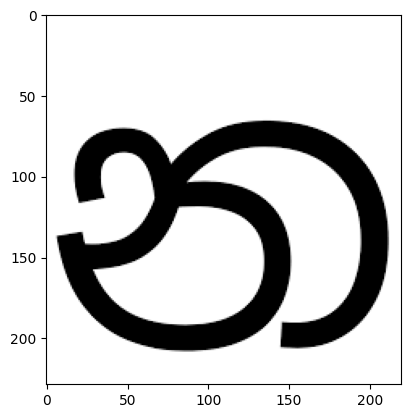

In [ ]:
img = plt.imread('na.1.png')
plt.imshow(img)

In [ ]:
# Load and preprocess the data
data = []
for index, row in df.iterrows():
    img_path = os.path.join(path, row['filename'])
    img = load_img(img_path, target_size=(100, 100))  # Adjust target_size as needed
    img_array = img_to_array(img)
    img_array /= 255.0  # Normalize pixel values
    data.append(img_array)

x = np.array(data)
y = df['category'].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


**Define and Compile CNN model**

In [ ]:
model = Sequential([
    Conv2D(32,(3,3), activation ='relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation = 'sigmoid'),
    Dense(1,activation = 'sigmoid')

])

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation ='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics =['accuracy'])

**Train the model**

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.7333 - accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 97ms/step - loss: 1.2955 - accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 81ms/step - loss: 0.5017 - accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 75ms/step - loss: 0.2076 - accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 67ms/step - loss: 0.1992 - accuracy: 1.0000


In [ ]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 185ms/step - loss: 1.3480 - accuracy: 0.5000


[1.347996473312378, 0.5]

**Testing sample data**

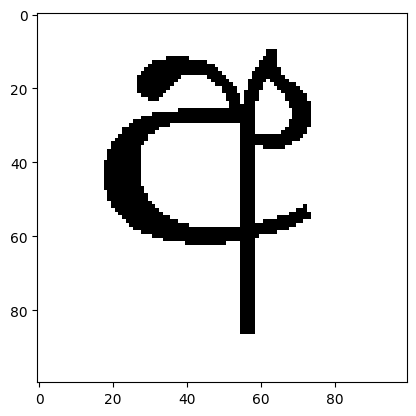

1/1 [==============================] - 0s 146ms/step
Our model says the letter is: aa


In [ ]:
# Select a random sample from the test set
idx2 = random.randint(0, len(y_test) - 1)

# Display the image
plt.imshow(x_test[idx2])
plt.show()

# Make a prediction
y_pred = model.predict(x_test[idx2].reshape(1, 100, 100, 3))
prediction_threshold = 0.5

# Check the predicted class
if y_pred[0, 0] > prediction_threshold:
    pred = 'aa'
else:
    pred = 'na'



# Display the true label
true_label = 'aa' if y_test[idx2] == 1 else 'na'
print("Our model says the letter is:", true_label)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions on the entire test set
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate and print performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("Classification Report:\n", classification_report(y_test, y_pred_binary))


1/1 [==============================] - 0s 46ms/step
Accuracy: 0.5
Confusion Matrix:
 [[0 2]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
